# Introduction to Machine Learning

## How manual coding works
![Coding](https://djcordhose.github.io/ai/img/sketch/coding.jpg)

## Opposing basic Idea of Supervised Machine Learning
![Machine Learning](https://djcordhose.github.io/ai/img/sketch/ml.jpg "Machine Learning")
### Hope: System can generalize to previously unknown data and situations

# Common Use Case: Classification
![Machine Learning Classification](https://djcordhose.github.io/ai/img/sketch/classification.jpg "Machine Learning Classification")

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pylab as plt
import numpy as np

In [4]:
from distutils.version import StrictVersion

In [5]:
import sklearn
print(sklearn.__version__)

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

0.19.0


In [6]:
# Evtl. hat Azure nur 0.19, wir brauchen aber .20 fÃ¼r das Plotting, dann das hier installieren und Notebook neu starten
# !conda update pandas -y

In [7]:
import pandas as pd
print(pd.__version__)

assert StrictVersion(pd.__version__) >= StrictVersion('0.20.0')

0.20.3


# One of the  Classics: Classify Iris Type by sizes of their flower

## First we load the data set and get an impression
* https://en.wikipedia.org/wiki/Iris_flower_data_set

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

In [9]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

https://en.wikipedia.org/wiki/File:Petal-sepal.jpg
![Petal vs Sepal](https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg)

In [10]:
X = iris.data
y = iris.target

In [11]:
X.shape, y.shape

((150, 4), (150,))

In [12]:
X[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [13]:
y[0]

0

In [14]:
X_sepal_length = X[:, 0]
X_sepal_width =  X[:, 1]
X_petal_length = X[:, 2]
X_petal_width = X[:, 3]

In [15]:
X_petal_width.shape

(150,)

## Scatterplot (red=Setosa, green=Versicolour, blue=Virginica)

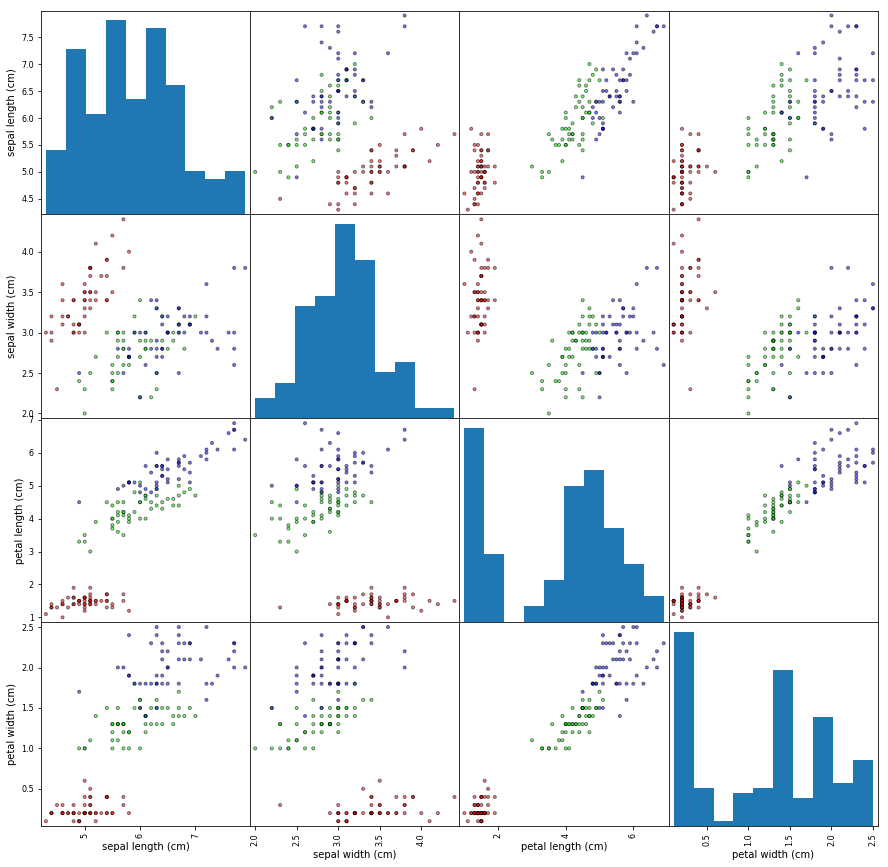

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
CMAP = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
pd.plotting.scatter_matrix(iris_df, c=iris.target, edgecolor='black', figsize=(15, 15), cmap=CMAP)
plt.show()

# Now for training
## Issue: How do we know if we have trained well?

### Splitting data in trainining and (60%) und test (40%)
http://scikit-learn.org/stable/modules/cross_validation.html

In [1]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((90, 4), (90,), (60, 4), (60,))

## We use KNN Classifier with two random features
http://scikit-learn.org/stable/modules/neighbors.html#classification
![KNN](https://djcordhose.github.io/ai/img/flashcards/Imputation_Using_k-NN.png "KNN")

In [20]:
from sklearn import neighbors

In [21]:
# ignore this, it is just technical code
# should come from a lib, consider it to appear magically 
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
font_size=25

def meshGrid(x_data, y_data):
    h = .02  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, colors, title="", mesh=True):
    xx,yy = meshGrid(x_data, y_data)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(20,10))
    if mesh:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(x_data, y_data, c=colors, cmap=cmap_bold, s=80, marker='o')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)

## Random Feature Selection: Sepal Features

In [22]:
X_train_sepal_only = X_train[:, :2]
X_test_sepal_only = X_test[:, :2]

In [23]:
X_train_sepal_only[0]

array([ 7.4,  2.8])

In [24]:
X_train[0]

array([ 7.4,  2.8,  6.1,  1.9])

### Training works very fast as we just record all positions in 2d space, no abstraction takes place with KNN

In [25]:
clf_sepal = neighbors.KNeighborsClassifier(1)
%time clf_sepal.fit(X_train_sepal_only, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.56 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

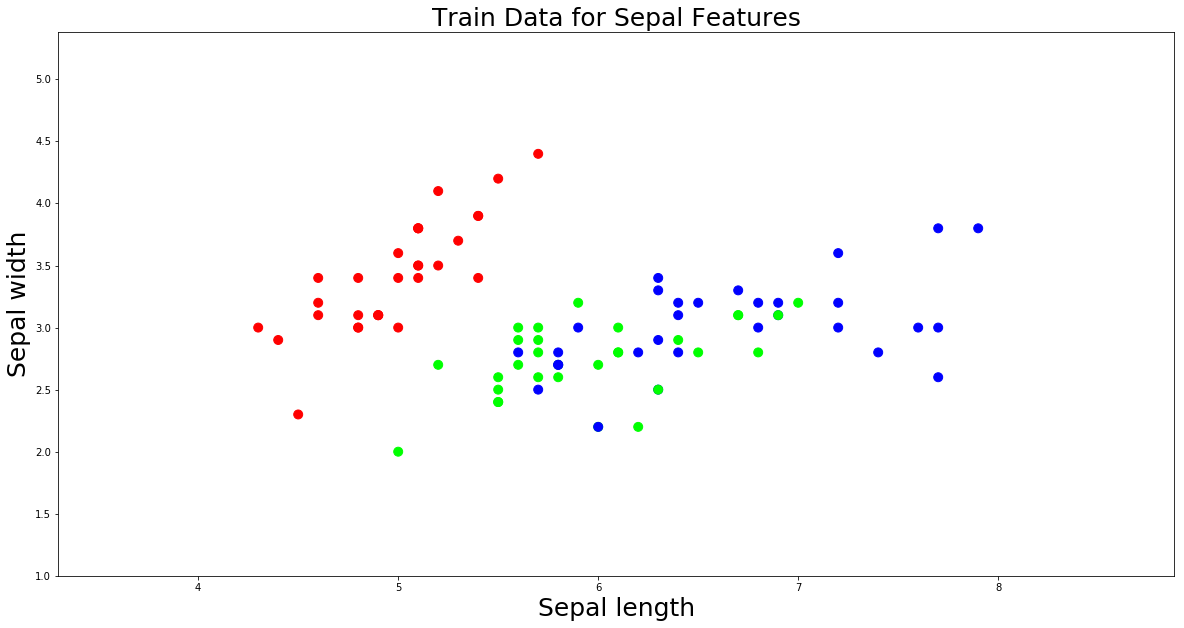

In [26]:
plotPrediction(clf_sepal, X_train_sepal_only[:, 0], X_train_sepal_only[:, 1], 
               'Sepal length', 'Sepal width', y_train, mesh=False,
                title="Train Data for Sepal Features")

### Getting some intuition: what does KNN predict for a previous unknown data set?

In [27]:
# 8 is tough because it is directly between 1 and 2
sample_id = 8
# sample_id = 50
sample_feature = X_test_sepal_only[sample_id]
sample_label = y_test[sample_id]

In [28]:
sample_feature

array([ 6.9,  3.1])

In [29]:
sample_label

2

In [30]:
clf_sepal.predict([sample_feature])

array([1])

### And we also try a completely made up data point

In [31]:
clf_sepal.predict([[6.0, 4.5]]) # slightly different from above, still gives 0

array([0])

### Evaluation: What perecentage in each set is corretly predicted?

In [32]:
# clf_sepal.score?

In [33]:
clf_sepal.score(X_train_sepal_only, y_train)

0.9555555555555556

In [34]:
clf_sepal.score(X_test_sepal_only, y_test)

0.80000000000000004

## Scores ok for training, not so good for test: Overfitting
### To understand what has happened we draw Decision Boundaries
For each data point we draw the prediction our model would give as an area

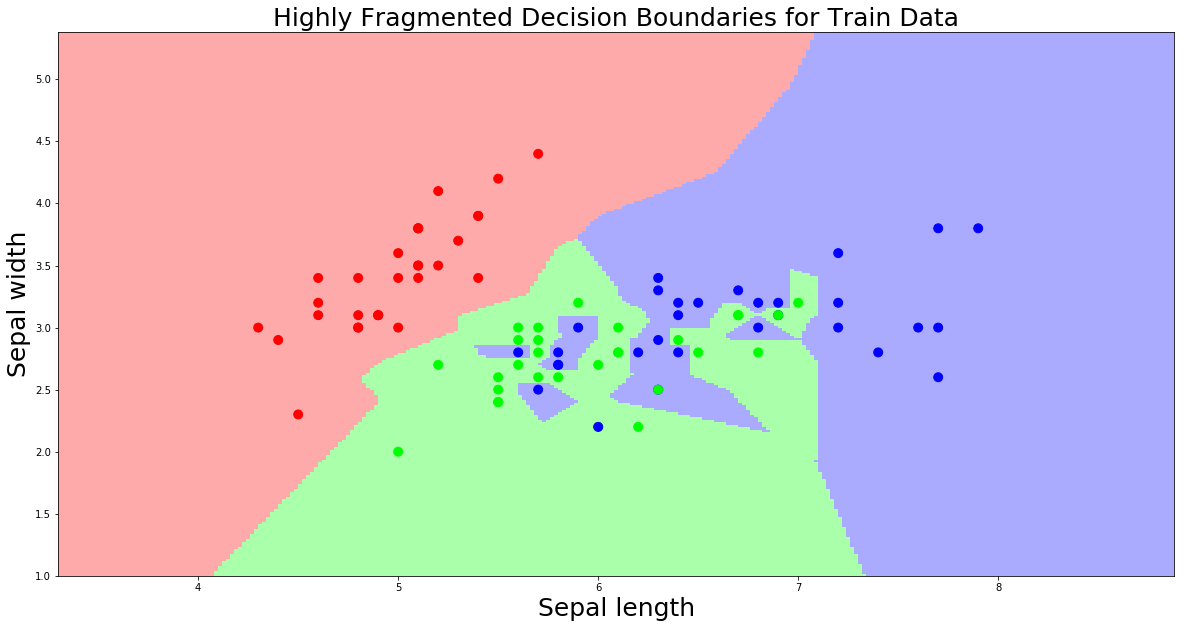

In [35]:
plotPrediction(clf_sepal, X_train_sepal_only[:, 0], X_train_sepal_only[:, 1], 
               'Sepal length', 'Sepal width', y_train,
               title="Highly Fragmented Decision Boundaries for Train Data")

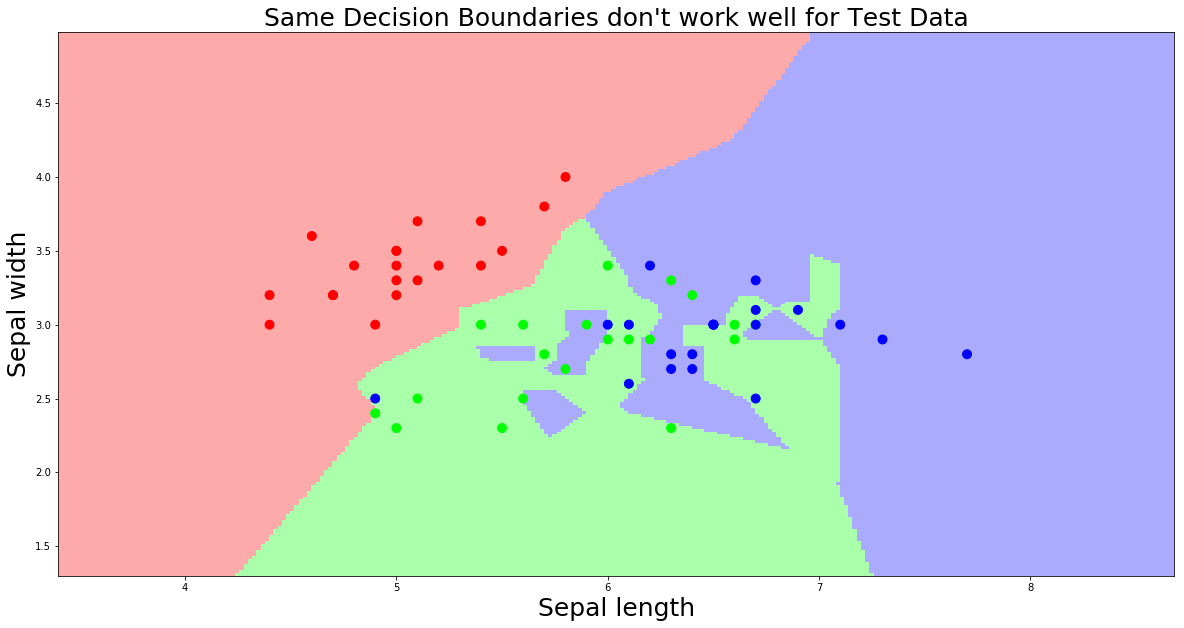

In [36]:
plotPrediction(clf_sepal, X_test_sepal_only[:, 0], X_test_sepal_only[:, 1],
               'Sepal length', 'Sepal width', y_test,
               title="Same Decision Boundaries don't work well for Test Data")

## We need to smoothen our boundaries
![KNN Size](https://djcordhose.github.io/ai/img/flashcards/K-NN_Neighborhood_Size.png "KNN Size")

### k=10 neighbors

In [2]:
# neighbors.KNeighborsClassifier?

In [38]:
clf_sepal_10 = neighbors.KNeighborsClassifier(10)
clf_sepal_10.fit(X_train_sepal_only, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [39]:
clf_sepal_10.score(X_train_sepal_only, y_train)

0.80000000000000004

In [40]:
clf_sepal_10.score(X_test_sepal_only, y_test)

0.76666666666666672

### Scores for both sets equally low: Undefitting

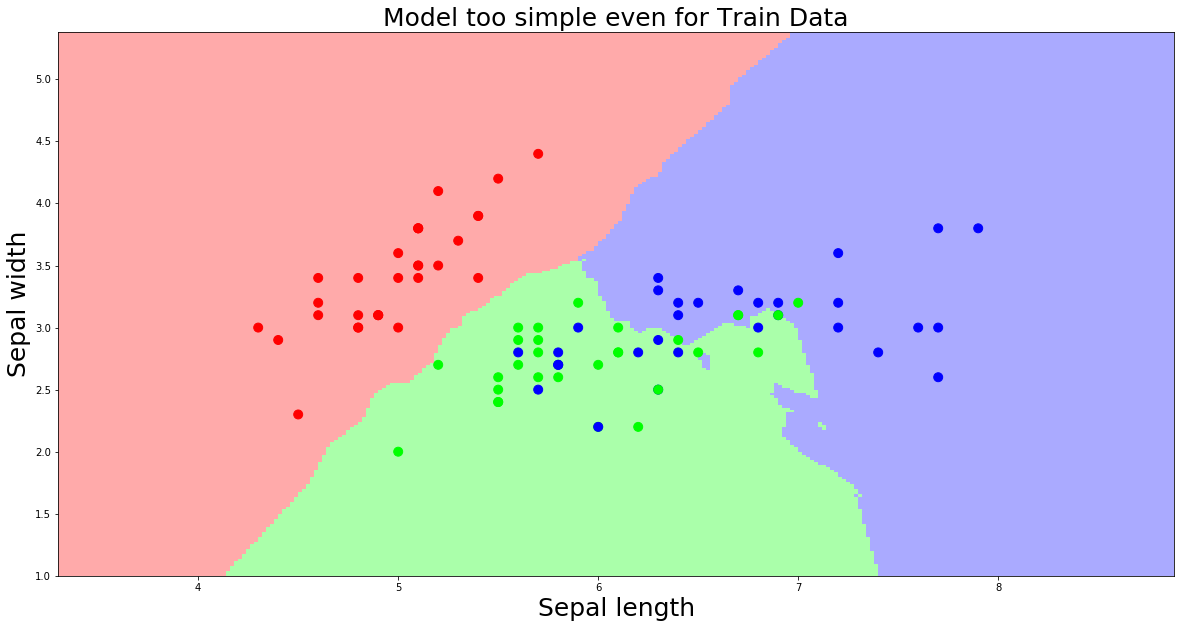

In [41]:
plotPrediction(clf_sepal_10, X_train_sepal_only[:, 0], X_train_sepal_only[:, 1], 
               'Sepal length', 'Sepal width', y_train,
               title="Model too simple even for Train Data")

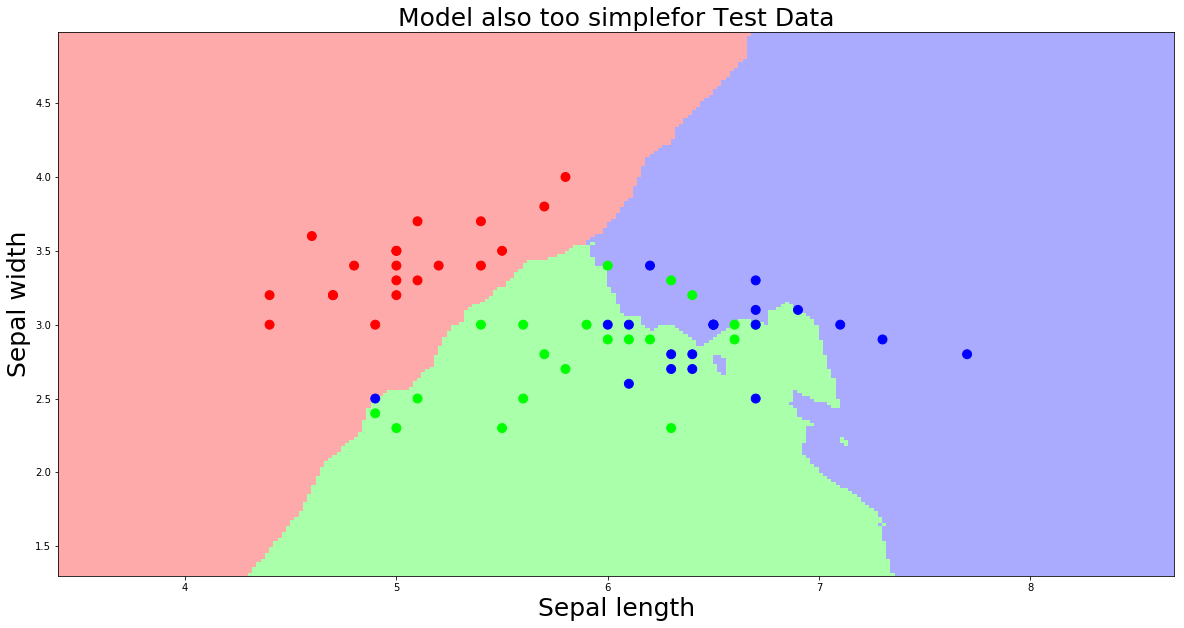

In [60]:
plotPrediction(clf_sepal_10, X_test_sepal_only[:, 0], X_test_sepal_only[:, 1], 
               'Sepal length', 'Sepal width', y_test,
               title="Model also too simple for Test Data")

## Relationship Overfittung / Underfitting
* Black Dots: Training Data
* Gray Dots: Test Data
![Overfitting, Underfitting](https://djcordhose.github.io/ai/img/bias_variance/underfitting_overfitting.png "Overfitting, Underfitting")

## Feature Selektion
### Sepal Features seem to always either over- or underfit
### Let us try Petal Features

In [43]:
X_train_petal_only = X_train[:, 2:]
X_test_petal_only = X_test[:, 2:]

In [44]:
X_train_petal_only[0]

array([ 6.1,  1.9])

In [45]:
X_train[0]

array([ 7.4,  2.8,  6.1,  1.9])

In [46]:
clf_petal_10 = neighbors.KNeighborsClassifier(10)
clf_petal_10.fit(X_train_petal_only, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

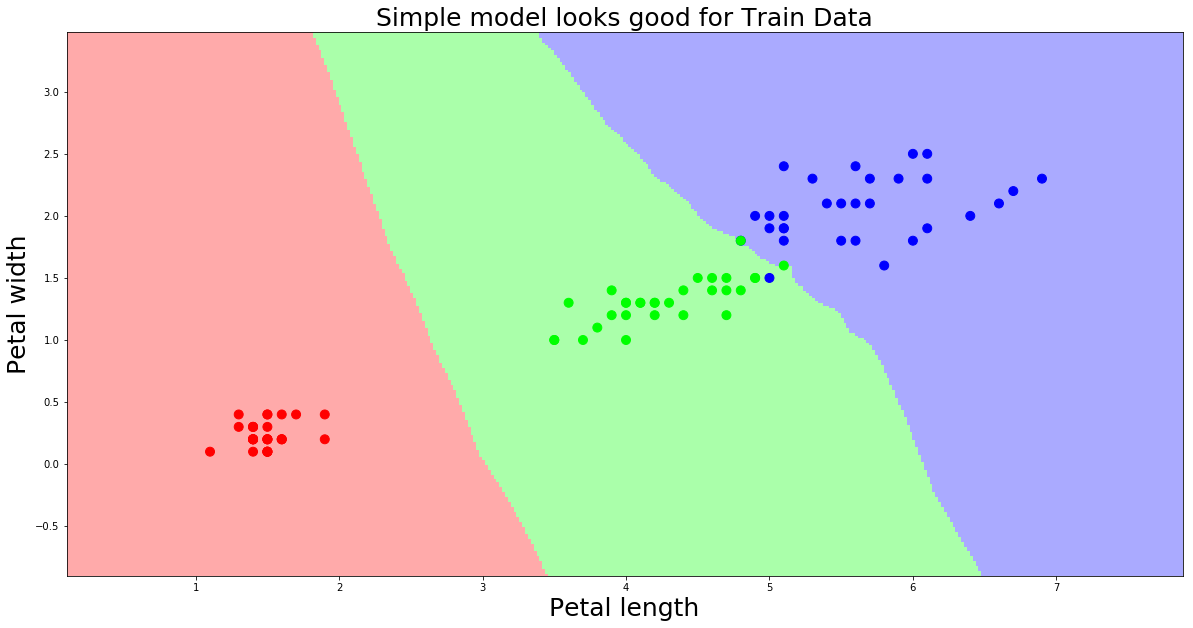

In [47]:
plotPrediction(clf_petal_10, X_train_petal_only[:, 0], X_train_petal_only[:, 1], 
               'Petal length', 'Petal width', y_train,
               title="Simple model looks good for Train Data")

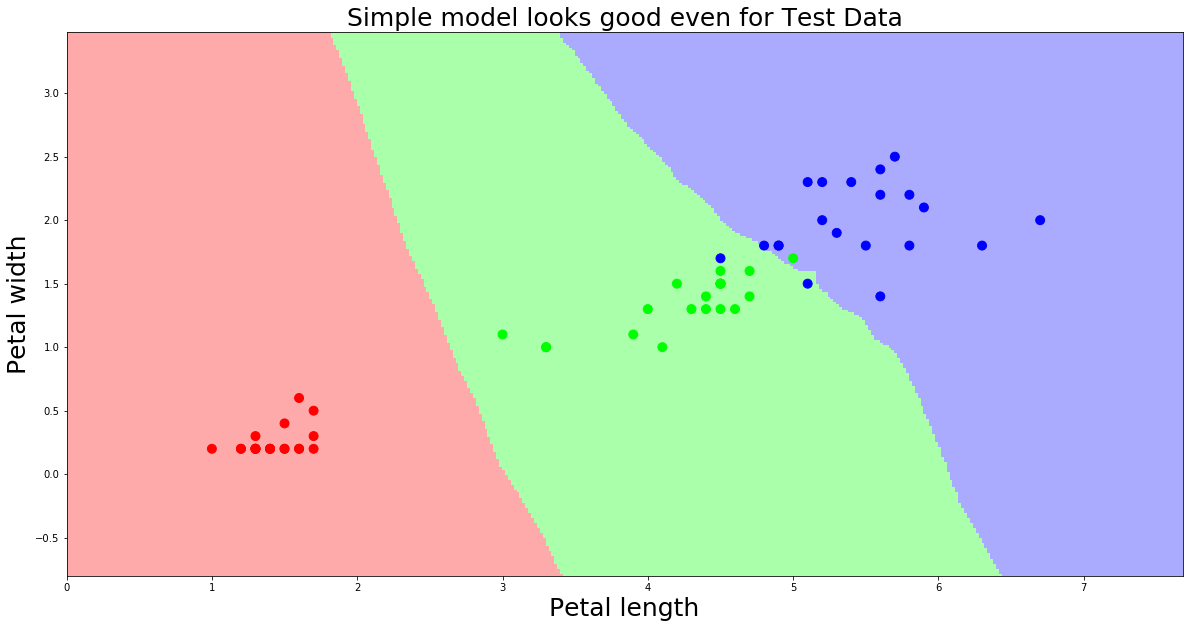

In [48]:
plotPrediction(clf_petal_10, X_test_petal_only[:, 0], X_test_petal_only[:, 1], 
               'Petal length', 'Petal width', y_test,
               title="Simple model looks good even for Test Data")

In [49]:
clf_petal_10.score(X_train_petal_only, y_train)

0.96666666666666667

In [50]:
clf_petal_10.score(X_test_petal_only, y_test)

0.94999999999999996

## Petal Features seem to be a better idea, what features we take seems to matter

## All 4 Features should give best results, though

In [51]:
clf = neighbors.KNeighborsClassifier(1)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [52]:
clf.score(X_train, y_train)

1.0

In [53]:
clf.score(X_test, y_test)

0.94999999999999996

### With one neighbor we overfit, let's try more neighbors

In [57]:
clf = neighbors.KNeighborsClassifier(13)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [58]:
clf.score(X_train, y_train)

0.97777777777777775

In [59]:
clf.score(X_test, y_test)

0.96666666666666667

### 13 Neighbors reaches the sweet spot for our train / test split
Might be different for other splits, 150 data sets generally is too small for reliable results

# Wrapup
1. With Supvervised Learning we train relationships between input and output
* to generalize is the objective
* overfitting (just lean by heart) and underfitting (do not learn properly in the first place) needs to be avoided
* finding the sweet spot between the two is the hardest part
* in a real-life use case we rarely have data as clean as in this example
* getting and clearning the data might be the most work intensve part
* feature selection can be crucial
* feature selection and engeneering might be second most work intensive part in classic machine learning
* deep learning promises to make feature selection and sometimes even cleaning obsolete
* 150 data sets generally is not enough
* however, the better the data, the less of it we need
* tuning of parameters for the best result can be done by automatic seach (GridSearch or RandomSearch)
* real problems with large feature spaces and more complex learning strategies can easily bring training times up to hours, days and even weeks
* using GPU and even distributed computing might be necessary

---

# Hands-On
## Execute this notebook and improve the training results
* look at the scatter plot and choose two other features that look promising to you
* select K to give the best result
* avoid overfitting and unterfitting
---